# Visualization Assignment

## Data Cleaning

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
data = pd.read_csv('tourism.csv')

In [3]:
data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [4]:
data['travel_with'] = data['travel_with'].fillna('No travel with info')

data['total_female'] = data['total_female'].fillna(0)

data['total_male'] = data['total_male'].fillna(0)

data['most_impressing'] = data['most_impressing'].fillna('No comments')

data.isnull().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_cost               0
dtype: int64

## VISUALIZATION

### Visualization 1: Bar Chart - Visiting Countries

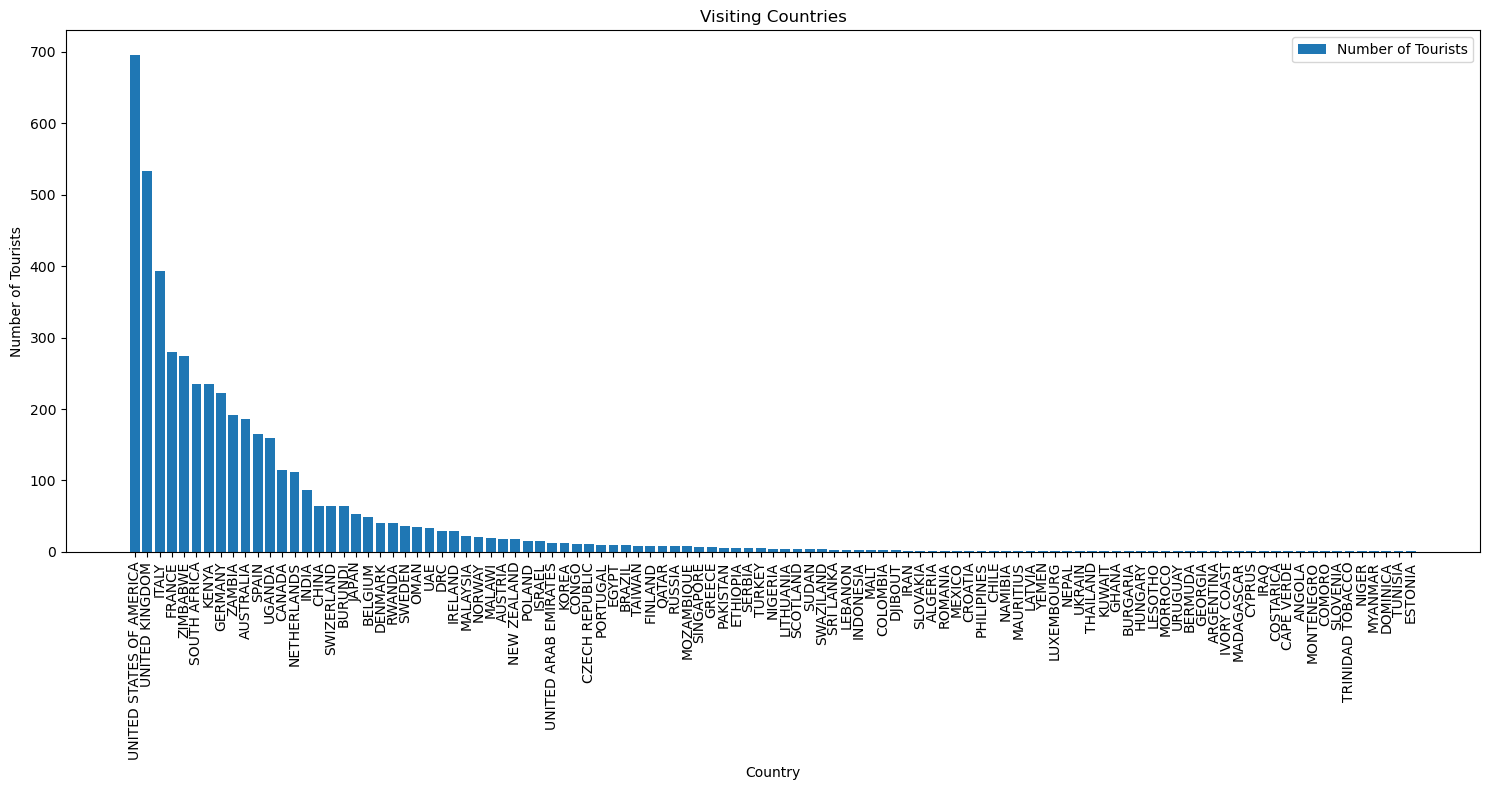

In [5]:
plt.figure(figsize=(15, 8))
Number_of_tourists = data['country'].value_counts()
plt.bar(Number_of_tourists.index, Number_of_tourists, label='Number of Tourists')
plt.title('Visiting Countries')
plt.xlabel('Country')
plt.ylabel('Number of Tourists')
plt.xticks(rotation=90)
plt.tight_layout()  # Add this line to adjust the layout
plt.legend()  # Add this line to show the legend
plt.show()

### Visualization 2: Scatter Plot - Age Group vs. Total Cost

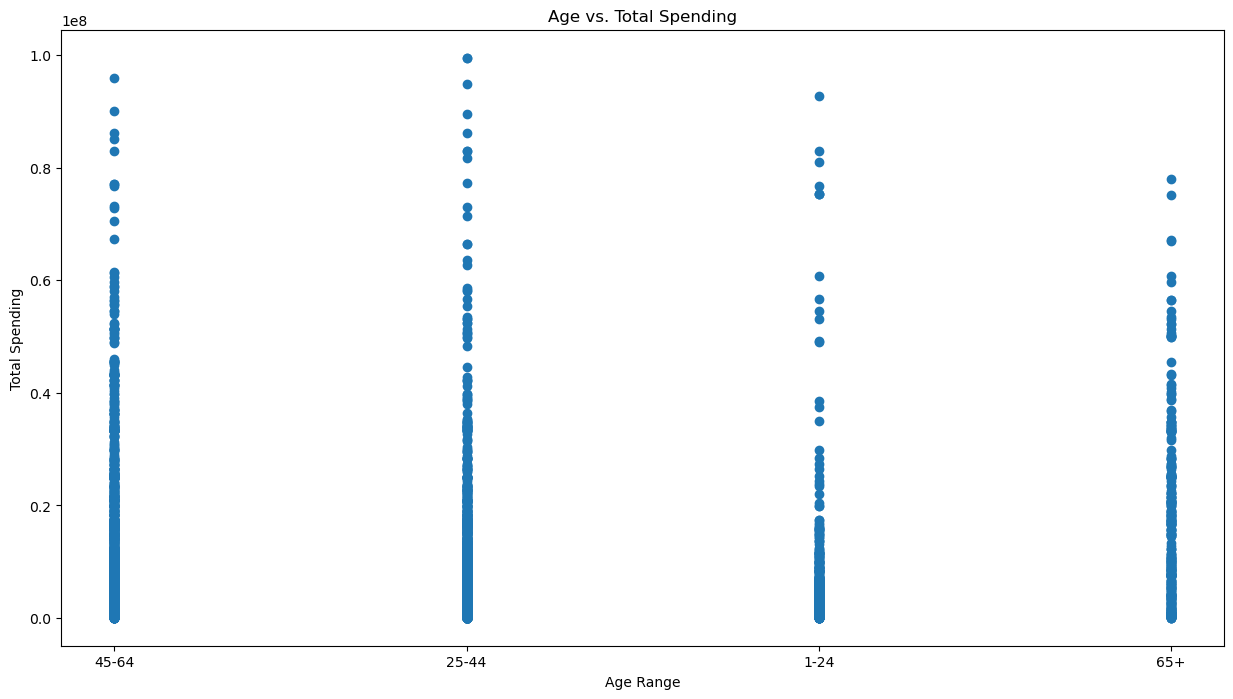

In [6]:
plt.figure(figsize=(15, 8))
plt.scatter(data['age_group'], data['total_cost'])
plt.title('Age vs. Total Spending')
plt.xlabel('Age Range')
plt.ylabel('Total Spending')
plt.show()

### Visualization 3: Pie Chart - Age Group Distribution

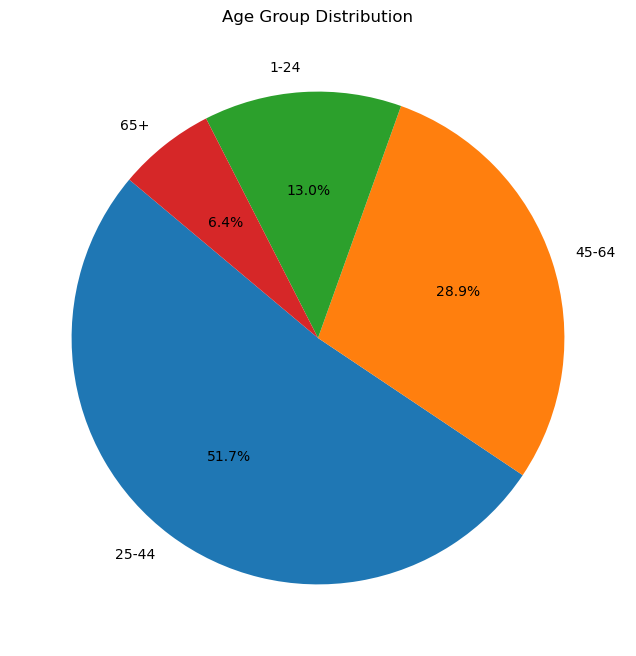

In [7]:
age_group_counts = data['age_group'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Age Group Distribution')
plt.show()

### Visualization 4: Bar Chart - Travel Purpose

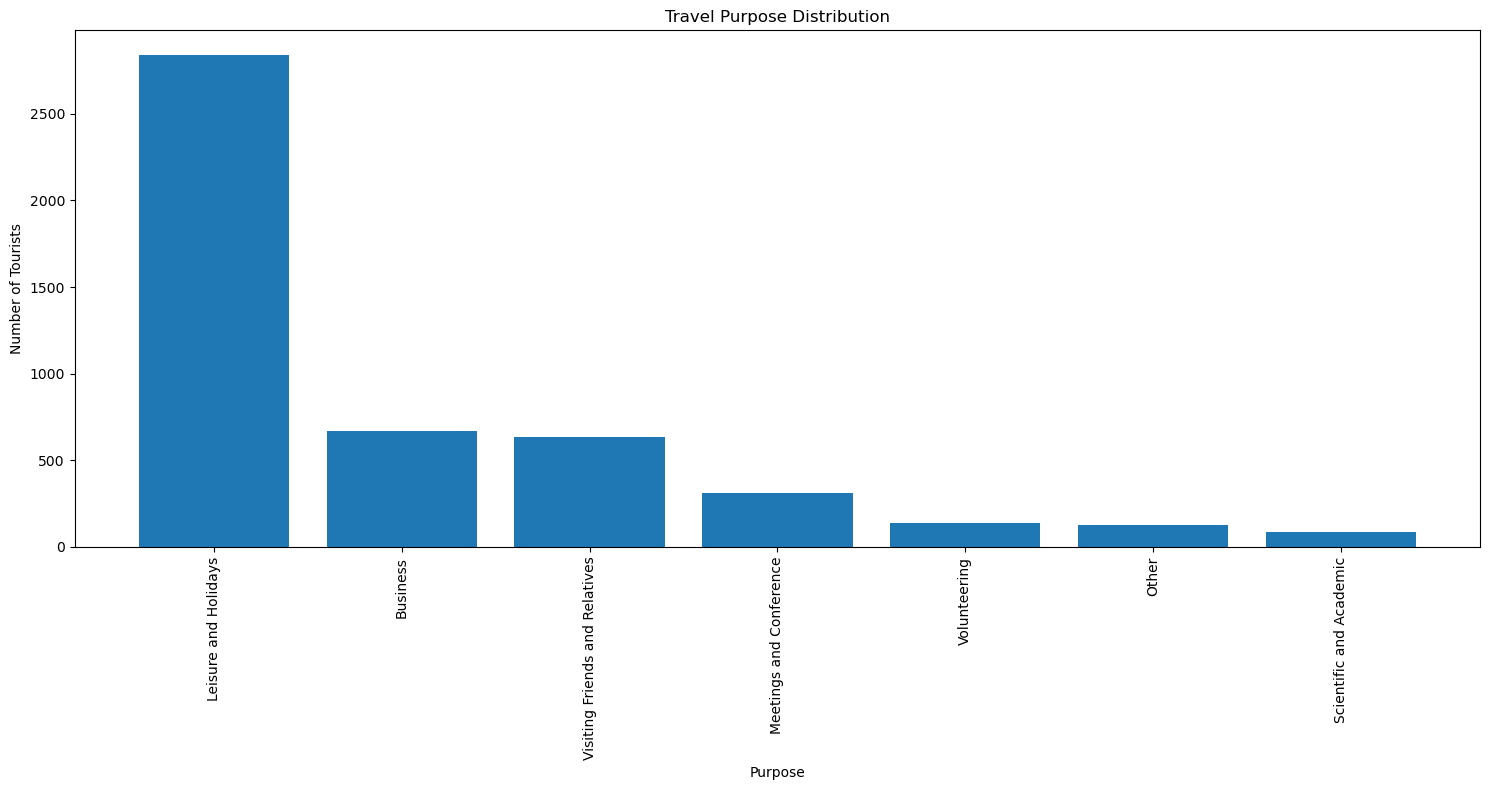

In [8]:
purpose_counts = data['purpose'].value_counts()
plt.figure(figsize=(15, 8))
plt.bar(purpose_counts.index, purpose_counts)
plt.title('Travel Purpose Distribution')
plt.xlabel('Purpose')
plt.ylabel('Number of Tourists')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Visualization 5: Histogram - Number of Tourists by Gender

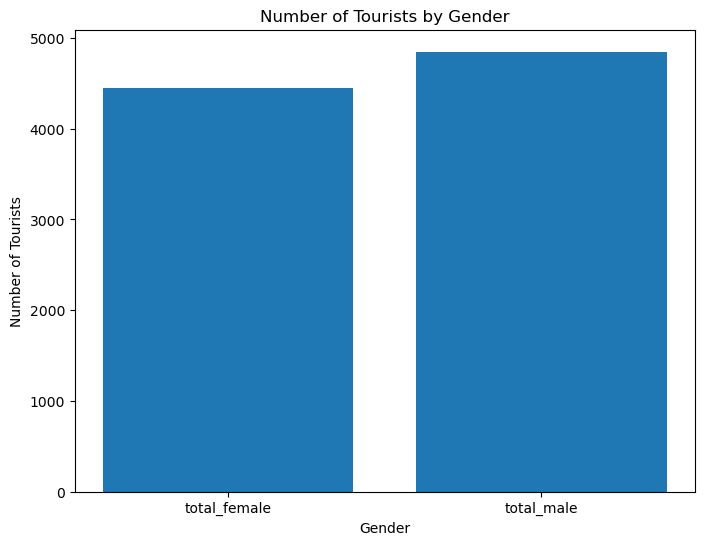

In [9]:
gender_count = data[['total_female', 'total_male']].sum()
plt.figure(figsize=(8, 6))
plt.bar(gender_count.index, gender_count)
plt.title('Number of Tourists by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Tourists')
plt.show()

### Visualization 6: Bar Chart - Main Activity

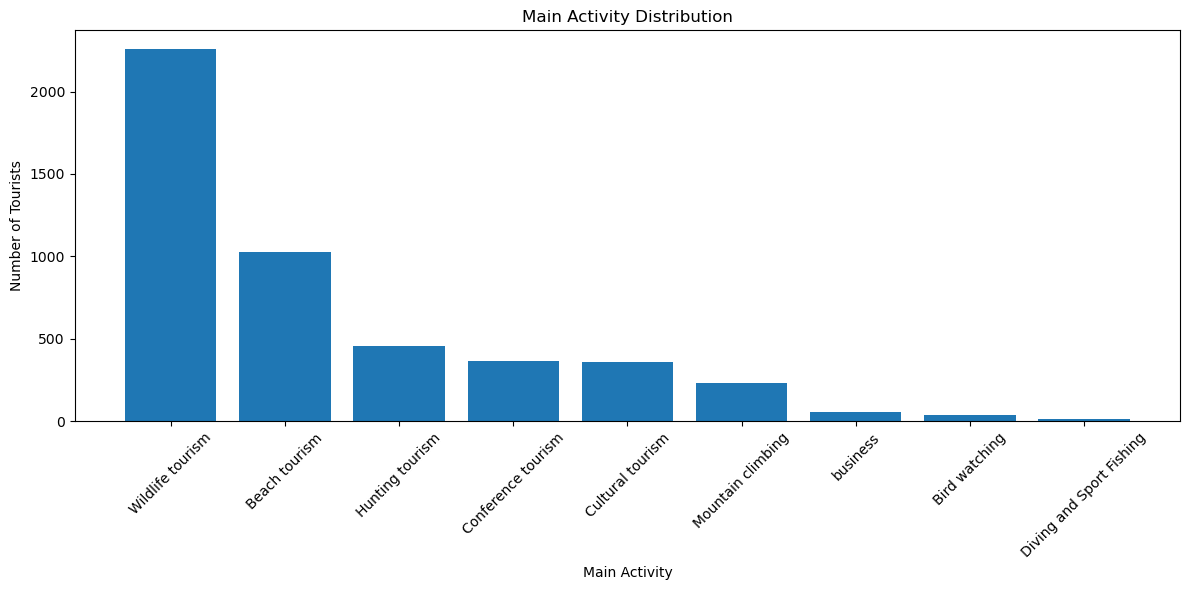

In [10]:
activity_counts = data['main_activity'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(activity_counts.index, activity_counts)
plt.title('Main Activity Distribution')
plt.xlabel('Main Activity')
plt.ylabel('Number of Tourists')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Visualization 7: Histogram - Number of Nights on Mainland and Zanzibar

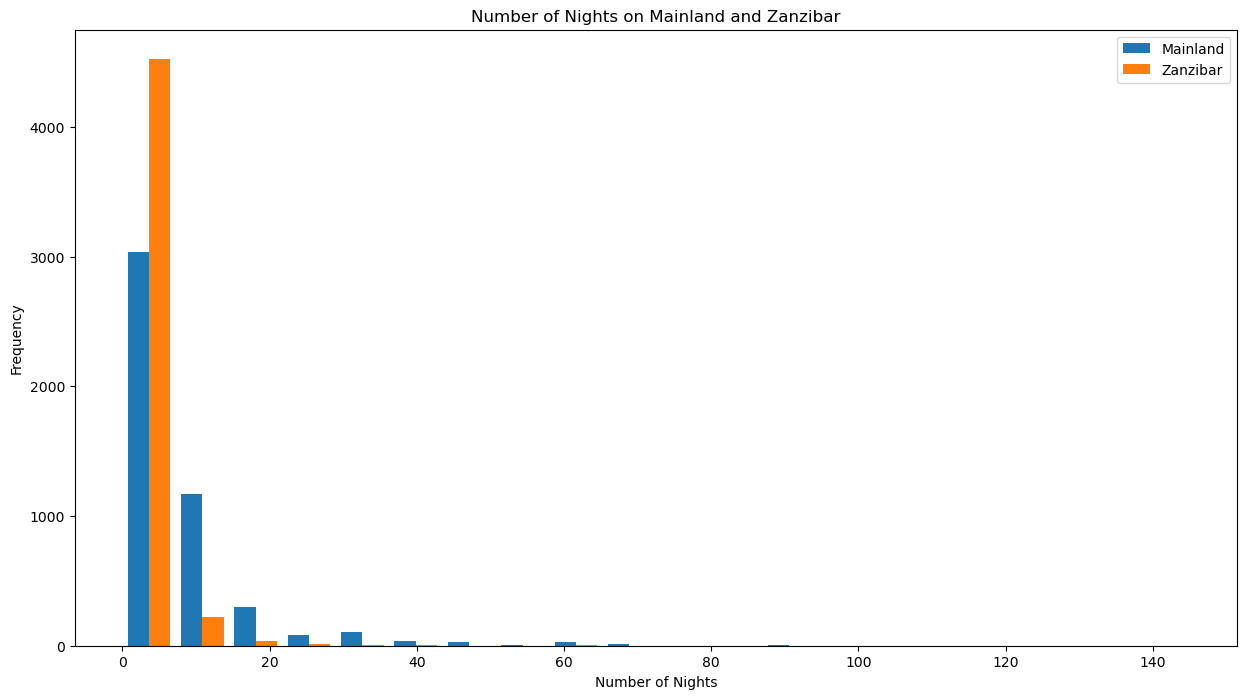

In [19]:
plt.figure(figsize=(15, 8))
plt.hist([data['night_mainland'], data['night_zanzibar']], bins=20, label=['Mainland', 'Zanzibar'])
plt.title('Number of Nights on Mainland and Zanzibar')
plt.xlabel('Number of Nights')
plt.ylabel('Frequency')
plt.legend()
# plt.ylim(0, 3000) 
plt.show()


### Visualization 8: Line Graph - Number of Nights on Mainland and Zanzibar

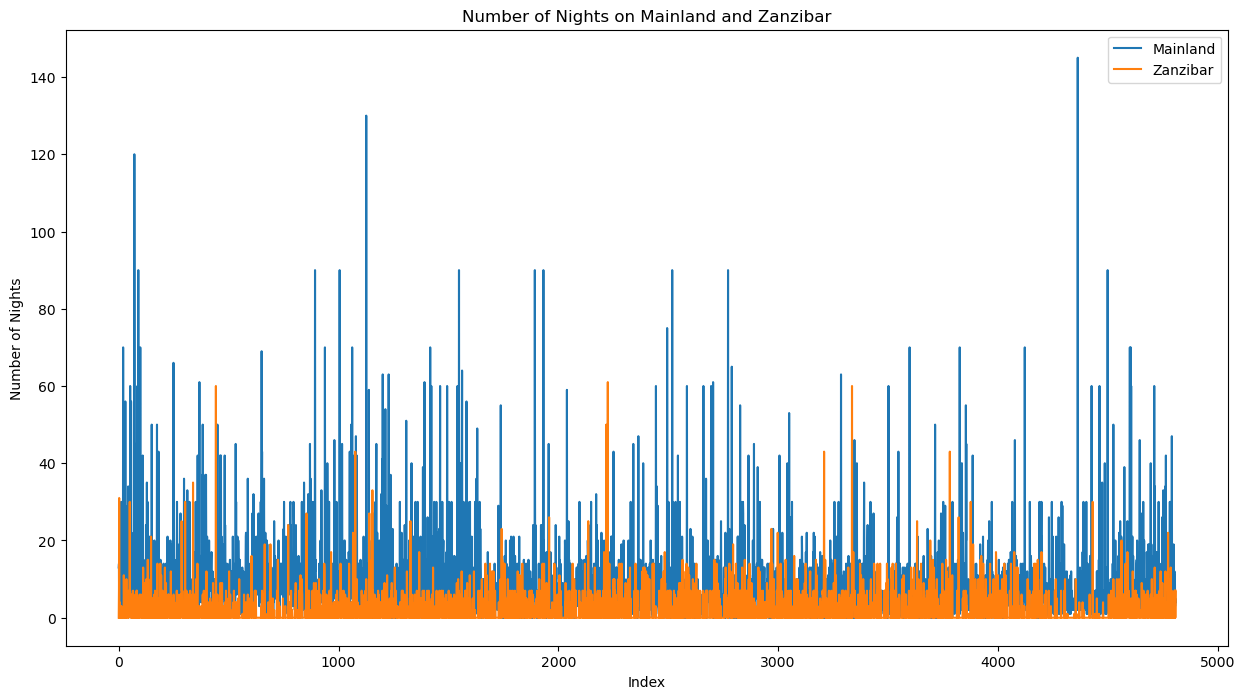

In [29]:
plt.figure(figsize=(15, 8))
plt.plot(data['night_mainland'], label='Mainland')
plt.plot(data['night_zanzibar'], label='Zanzibar')
plt.title('Number of Nights on Mainland and Zanzibar')
plt.xlabel('Index')
plt.ylabel('Number of Nights')
plt.legend()
plt.show()


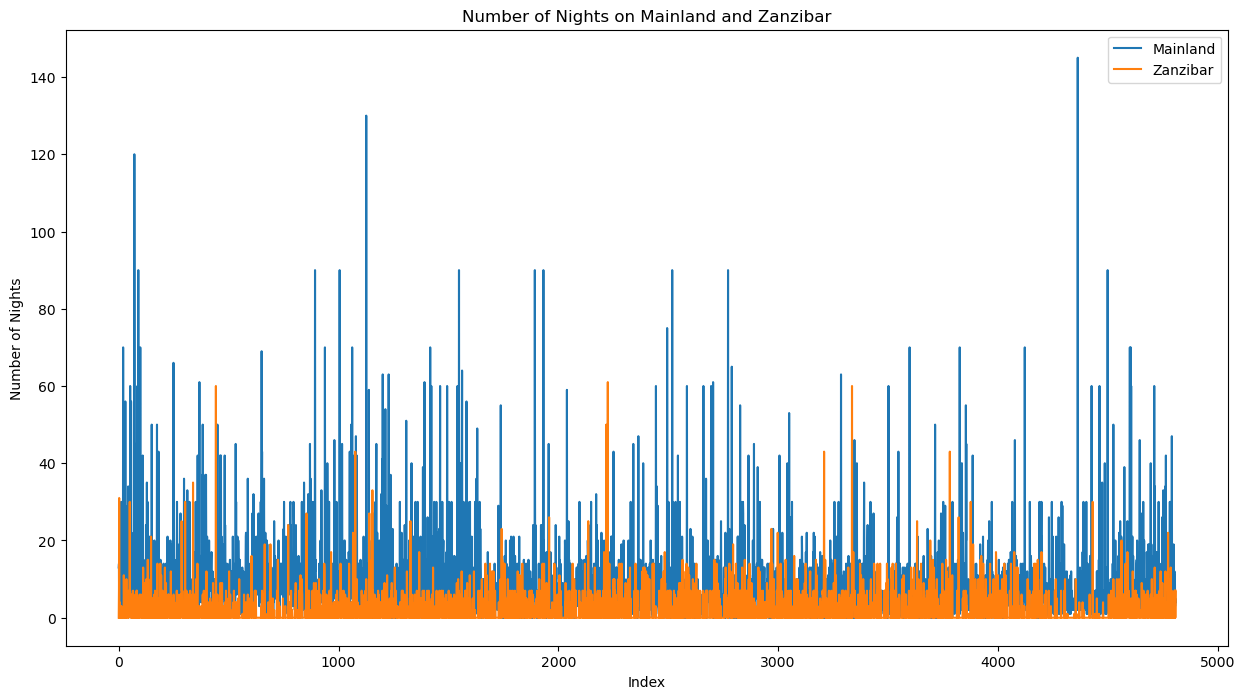

In [30]:
# Generate x values
x = np.arange(len(data))

# Extract data for nights on mainland and Zanzibar
nights_mainland = data['night_mainland']
nights_zanzibar = data['night_zanzibar']

# Create the line graph
plt.figure(figsize=(15, 8))
plt.plot(x, nights_mainland, label='Mainland')
plt.plot(x, nights_zanzibar, label='Zanzibar')
plt.title('Number of Nights on Mainland and Zanzibar')
plt.xlabel('Index')
plt.ylabel('Number of Nights')
plt.legend()
plt.show()


### Visualization 9: Box Plot - Total Cost by Tour Arrangement

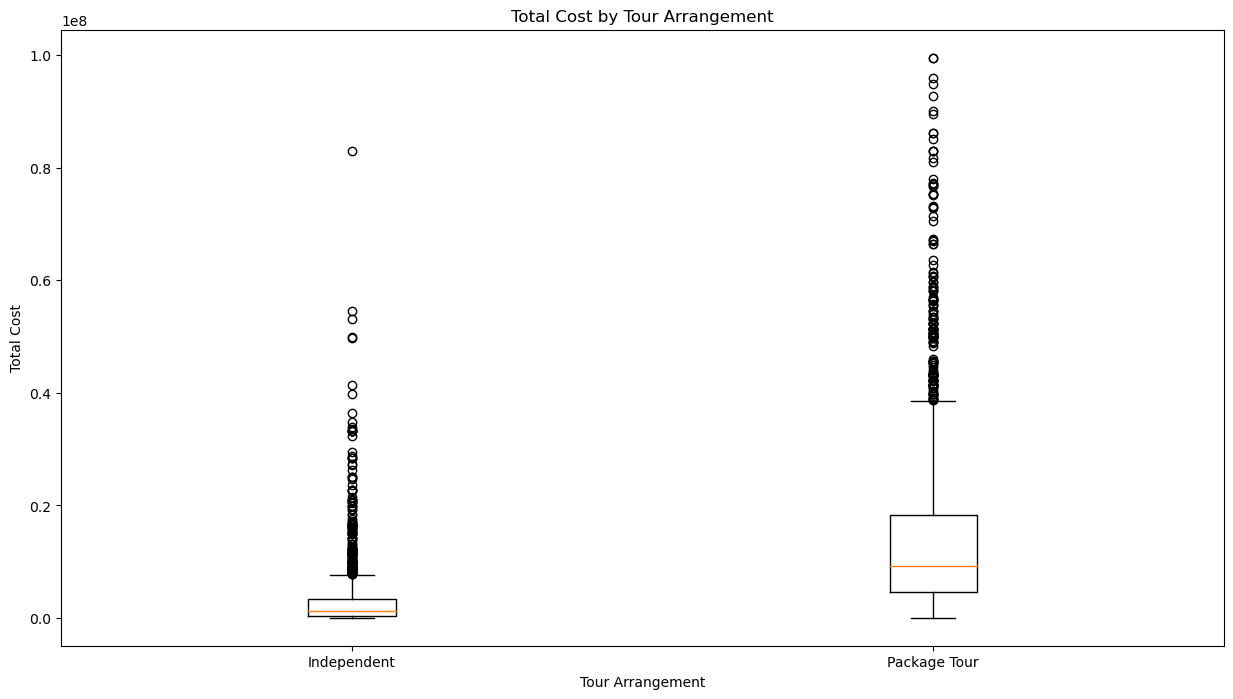

In [28]:
plt.figure(figsize=(15, 8))
plt.boxplot([data[data['tour_arrangement'] == 'Independent']['total_cost'],
             data[data['tour_arrangement'] == 'Package Tour']['total_cost']],
            labels=['Independent', 'Package Tour'])
plt.title('Total Cost by Tour Arrangement')
plt.xlabel('Tour Arrangement')
plt.ylabel('Total Cost')
plt.show()

### Visualization 10: Heatmap - Correlation Matrix

/var/folders/c6/2s1pssz95z92ddtnxkgtzj3c0000gn/T/ipykernel_10775/2937648217.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


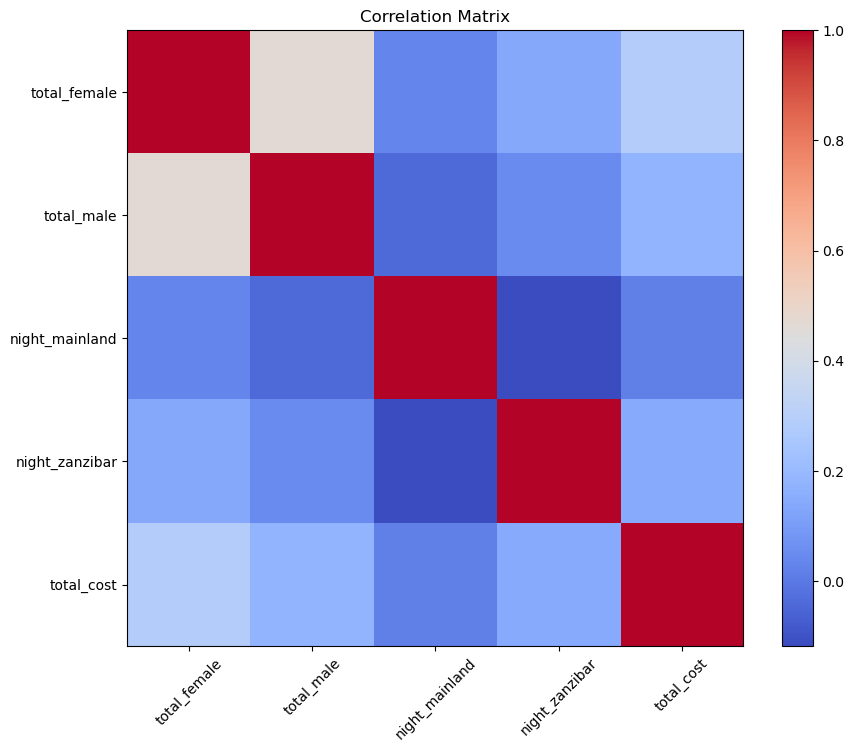

In [31]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.title('Correlation Matrix')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.show()

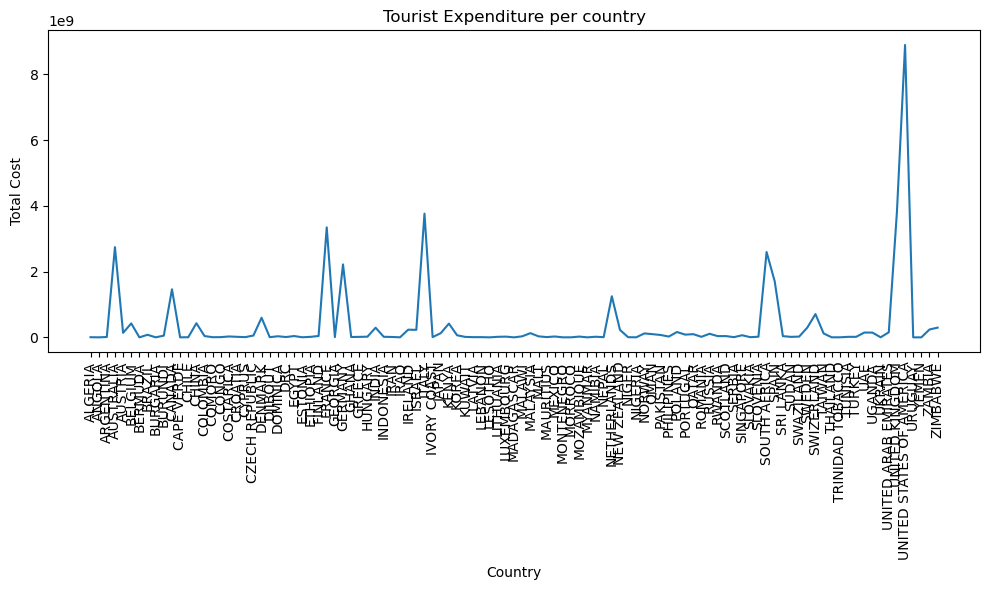

In [40]:
plt.figure(figsize=(10, 6))
yearly_arrivals = data.groupby('country')['total_cost'].sum()
plt.plot(yearly_arrivals.index, yearly_arrivals)
plt.title('Tourist Expenditure per country')
plt.xlabel('Country')
plt.ylabel('Total Cost')
plt.tight_layout()  # Add this line to adjust the layout
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
